<a href="https://colab.research.google.com/github/PUNEETSUBHANJI/Health_insurance_cross_sell_prediction/blob/main/Health_insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Insurance Cross Sell Prediction**

### **Predict Health insurance owners' who will be interested in buying Vehicle Insurance**

Our client is an Insurance company that has supplied Health Insurance to its customers now they require help in building a model to predict whether the consumers from the past year will also be interested in Vehicle Insurance provided by the company.

**Objective**

Building a model to predict a customer's interest in Vehicle Insurance is very beneficial for the business because it allows it to design its communication strategy to reach out to those clients in the most effective way possible and maximize its business model and revenue.

# Importing Required Libreries and Data

## Importing Required Libreries, mounting of drive and loading the dataset.

In [4]:
# importing libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
# Mounting of Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading of data
health_data=pd.read_csv("/content/drive/MyDrive/Projects- Almabetter_Puneet/Health Insurance Cross Sell/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

# Data summarization

##DATA Description:

* **id** :  Unique ID of the existing Health insurance customer
* **Gender** :  Gender details of the health insurance owner.
* **Age** :  Age details of the health insurance owner.
* **Driving_License** :  Whether the customer has a driving license or Not.
* **Region_Code** :  Region with code details of the health insurance owner.
* **Previously_Insured** :  Whether the customer previously_Insured or Not.
* **Vehicle_Age** :  Age of vehicle of the health insurance owner.
* **Vehicle_Damage** :  Whether the customer Vehicle Damaged or Not.
* **Annual_Premium** :  Annual Premium amount details of a Customer.
* **Policy_Sales_Channel** :  Policy Sales Channel shows us,the number of the sales channel.
* **Vintage** :  vintage details of year and car.
* **Response** :  Response of the customer to buying vehicle insurance.


In [7]:
# lets look at first 5 rows
health_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
# lets look at last 5 rows
health_data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [9]:
# lets check shape, null values and datatypes,
print(health_data.info())
print()
print(health_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

As per above observation we can say that : Dataset consists of **381109** rows & **12** columns. There are no Null or missing values present in the dataset.

In [10]:
# Descriptive Statistical Summary of Numeric Variables

health_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Data analysis and visualizations

##### Analysis of Age vs Response

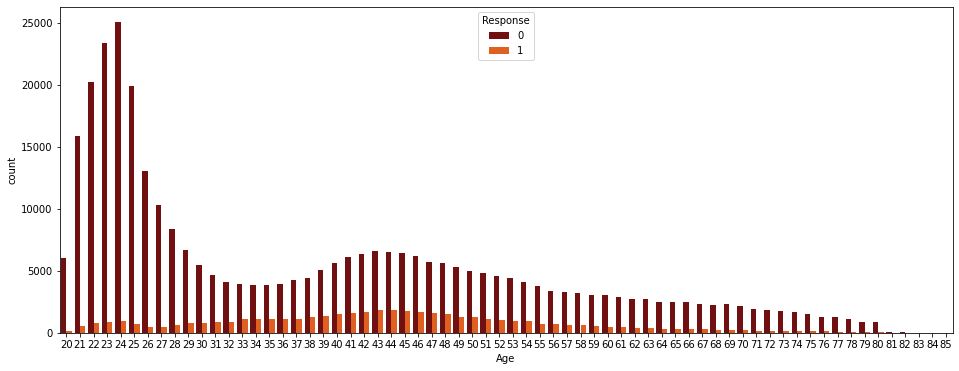

In [11]:
# Analysis of Age & Response
plt.figure(figsize=(16,6))
sns.countplot(x='Age',hue='Response',data=health_data, palette = 'gist_heat' )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


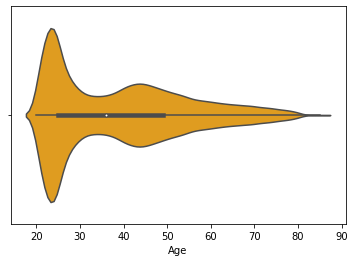

In [12]:
sns.violinplot(health_data['Age'], color ='orange')

* Vehicle insurance doesn't hold much appeal for any youngsters under 30. Reasons could be absence of involvement, less awareness about insurance and they might not yet have expensive vehicles.
* People who fall between the ages of 30 and 60 are more likely to be interested in and eager to buy.
* From the plot we can say that there are no outlier in the given .

##### Analysis of target variable 'response per count'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


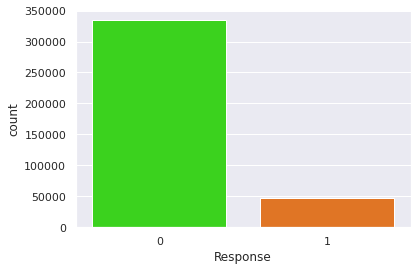

In [13]:
# Analyzing by plotting countplot
sns.set_theme(style='darkgrid')
sns.countplot(health_data['Response'], data=health_data, palette = 'gist_ncar')

* As per above observation, we can say that data is incredibly imbalanced

##### Analyze : Previously_Insured w.r.t Response

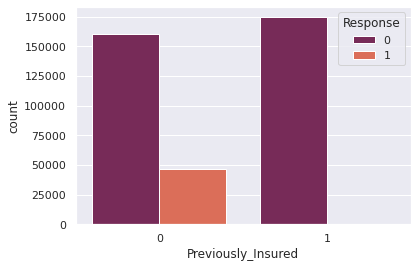

In [14]:
# Response analysis of previously insured customers from plot
sns.countplot(x='Previously_Insured',hue='Response',data=health_data,palette='rocket')

* Customers without previous insurance are probably interested.

##### Analysis based on Gender

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


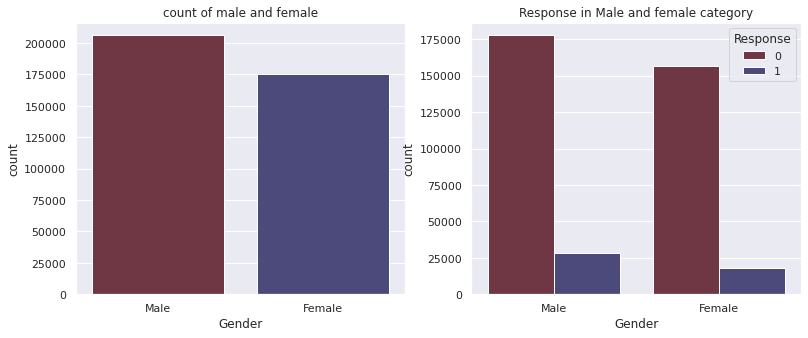

In [15]:
# Analyzing gender by plotting countplot
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(health_data['Gender'],palette='icefire_r')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(health_data['Gender'], hue = health_data['Response'],palette='icefire_r')
plt.title("Response in Male and female category")
plt.show()

* We saw a similarity in the distribution of gender-related factors.
* Male category is somewhat more noteworthy than that of female and chances of purchasing the insurance is likewise minimal high.

Analysis on Driving License

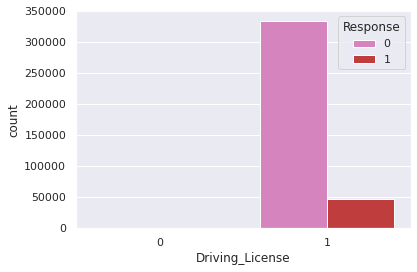

In [16]:
# Plotting countplot for Anlysis
sns.countplot(x='Driving_License',hue='Response', data=health_data, palette='tab10_r')

* The majority of customers who expressed interest in vehicle insurance have a driver's license.

##### Anlysis of Vehicle_Age w.r.t Response

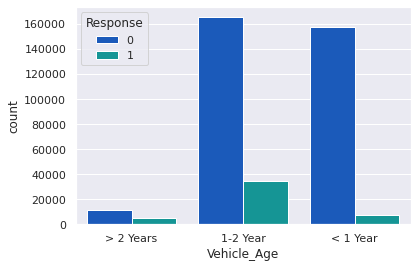

In [17]:
sns.countplot(x='Vehicle_Age',hue='Response',data=health_data,palette='winter')

* Consumers with vehicles that are between 1-2 years old are more interested than others.

* Customers who own vehicles that are less than 1 year old have very little chance of purchasing insurance.

##### Analysis based on Annual_Premium


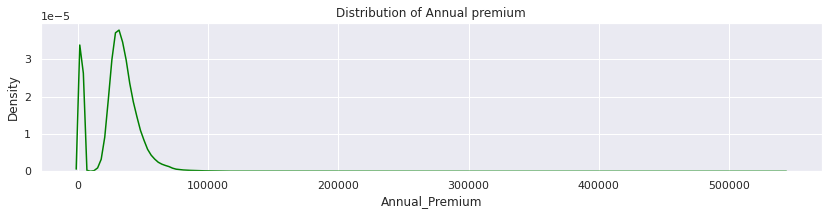

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


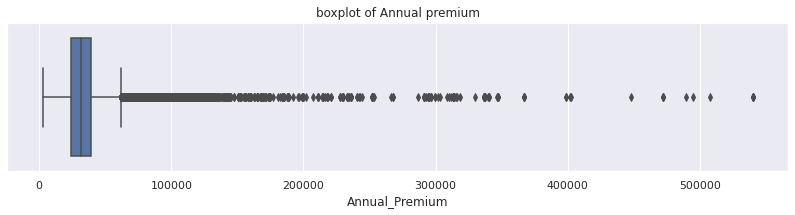

In [18]:
# Distribution of Annual premium
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.kdeplot(health_data['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

# Boxplot of Annual premium
plt.figure(figsize=(14,6))
plt.subplot(2,1,2)
sns.boxplot(health_data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()


* Its observed from the distribution plot, that the annual premimum feature is right skewed.
* Many outliers may be seen in the variables from the boxplot shown above.

##### Defining Correlation 

Text(0.5, 1, 'Correlation of Variables')

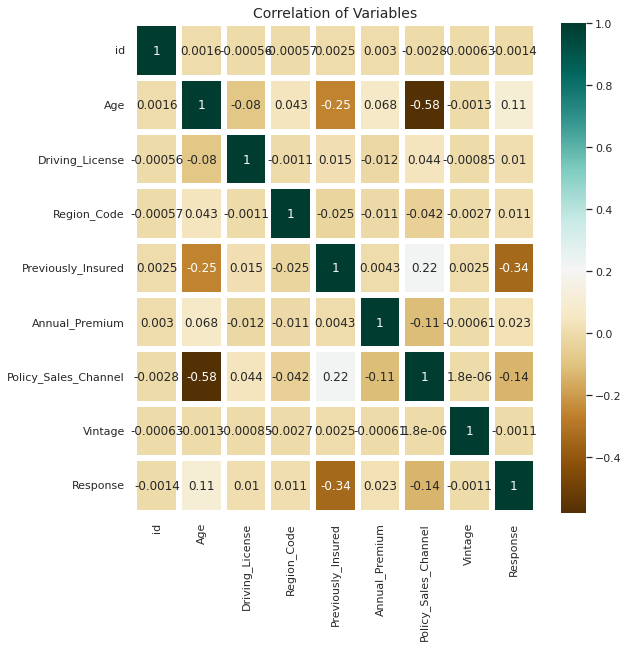

In [19]:
# Plotting heatmap to find correlation
corr = health_data.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, ax=ax, annot=True,linewidths=5,cmap='BrBG')
plt.title("Correlation of Variables", y=1, size=14)

*   Vintage features's is not much affecting Target variable. So we can drop such a least correlated features's.